<a href="https://colab.research.google.com/github/hashir5/Econometrics-Analysis-Semester-Project-/blob/main/econometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from plotnine import ggplot, aes, geom_point, labs


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import plot_regress_exog
import matplotlib.pyplot as plt




In [4]:
df = pd.read_csv("my data.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  170 non-null    object 
 1   Year                                                          170 non-null    int64  
 2   Age dependency ratio (% of working-age population)            170 non-null    float64
 3   Agriculture, value added (% of GDP)                           159 non-null    float64
 4   Agriculture, value added (annual % growth)                    159 non-null    object 
 5   Agriculture, value added (constant 2005 US$)                  161 non-null    float64
 6   Borrowers from commercial banks (per 1,000 adults)            60 non-null     float64
 7   Contributing family workers, female (% of female employment)  170 non-n

In [9]:
df.head()

,Country Name,Year,Age dependency ratio (% of working-age population),"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)","Agriculture, value added (constant 2005 US$)","Borrowers from commercial banks (per 1,000 adults)","Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)",Domestic credit provided by financial sector (% of GDP),Domestic credit to private sector (% of GDP)
0,Afghanistan,2000,103.326360,NaN,NaN,NaN,NaN,71.424004,30.347000,35.736000,NaN,NaN
1,Afghanistan,2001,102.927773,NaN,NaN,NaN,NaN,73.486000,31.297001,36.914001,NaN,NaN
2,Afghanistan,2002,102.153959,37.938821,NaN,3.524250e+09,NaN,65.669998,32.019001,36.363998,NaN,NaN
3,Afghanistan,2003,101.200485,36.863058,2.79922332379998,3.622902e+09,NaN,65.640999,26.607000,31.860001,NaN,NaN
4,Afghanistan,2004,100.159030,29.391196,-22.2374972096684,2.817259e+09,NaN,67.136002,25.983000,31.629000,NaN,NaN


In [10]:
df['Agriculture, value added (% of GDP)'] = df['Agriculture, value added (% of GDP)'].fillna(df['Agriculture, value added (% of GDP)'].mean())

In [11]:
df['Agriculture, value added (annual % growth)'] = pd.to_numeric(df['Agriculture, value added (annual % growth)'], errors='coerce')

df['Agriculture, value added (annual % growth)'] = df['Agriculture, value added (annual % growth)'].fillna(df['Agriculture, value added (annual % growth)'].mean())

In [12]:
df['Agriculture, value added (constant 2005 US$)'] = df['Agriculture, value added (constant 2005 US$)'].fillna(df['Agriculture, value added (constant 2005 US$)'].mean())

In [13]:
df['Borrowers from commercial banks (per 1,000 adults)'] = df['Borrowers from commercial banks (per 1,000 adults)'].fillna(df['Borrowers from commercial banks (per 1,000 adults)'].mean())

In [14]:
df['Domestic credit provided by financial sector (% of GDP)'] = df['Domestic credit provided by financial sector (% of GDP)'].fillna(df['Domestic credit provided by financial sector (% of GDP)'].mean())

In [15]:
df['Domestic credit to private sector (% of GDP)'] = df['Domestic credit to private sector (% of GDP)'].fillna(df['Domestic credit to private sector (% of GDP)'].mean())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  170 non-null    object 
 1   Year                                                          170 non-null    int64  
 2   Age dependency ratio (% of working-age population)            170 non-null    float64
 3   Agriculture, value added (% of GDP)                           170 non-null    float64
 4   Agriculture, value added (annual % growth)                    170 non-null    float64
 5   Agriculture, value added (constant 2005 US$)                  170 non-null    float64
 6   Borrowers from commercial banks (per 1,000 adults)            170 non-null    float64
 7   Contributing family workers, female (% of female employment)  170 non-n

In [17]:
df.describe()

,Year,Age dependency ratio (% of working-age population),"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)","Agriculture, value added (constant 2005 US$)","Borrowers from commercial banks (per 1,000 adults)","Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)",Domestic credit provided by financial sector (% of GDP),Domestic credit to private sector (% of GDP)
count,170.000000,170.000000,170.000000,170.000000,1.700000e+02,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,2008.000000,54.032705,8.978652,3.254081,1.146022e+11,133.560366,18.120947,6.028418,8.790253,104.904391,87.695878
std,4.913452,19.479788,9.540455,8.518563,1.702100e+11,69.929564,24.373163,8.437383,11.412909,69.952748,59.232844
min,2000.000000,16.452804,0.094254,-25.507246,6.372195e+07,2.958698,0.010000,0.010000,0.012000,-10.151829,3.598476
25%,2004.000000,44.704890,1.132139,0.572044,1.409726e+10,133.560366,0.132500,0.080250,0.096000,46.536317,33.818622
50%,2008.000000,50.572943,3.170655,3.254081,2.540045e+10,133.560366,0.446500,0.256000,0.344000,104.904391,87.695878
75%,2012.000000,60.851400,17.260038,5.907912,1.579082e+11,133.560366,37.832001,11.647750,20.463000,155.684913,130.179773
max,2016.000000,103.326360,37.938821,44.565447,7.336926e+11,383.703540,73.486000,32.019001,36.914001,250.601310,206.302777


In [18]:
df.columns

Index(['Country Name', 'Year',
       'Age dependency ratio (% of working-age population)',
       'Agriculture, value added (% of GDP)',
       'Agriculture, value added (annual % growth)',
       'Agriculture, value added (constant 2005 US$)',
       'Borrowers from commercial banks (per 1,000 adults)',
       'Contributing family workers, female (% of female employment)',
       'Contributing family workers, male (% of male employment)',
       'Contributing family workers, total (% of total employment)',
       'Domestic credit provided by financial sector (% of GDP)',
       'Domestic credit to private sector (% of GDP)'],
      dtype='object')

In [19]:
selected = df[['Age dependency ratio (% of working-age population)',
       'Agriculture, value added (% of GDP)',
       'Agriculture, value added (annual % growth)',
       'Agriculture, value added (constant 2005 US$)',
       'Borrowers from commercial banks (per 1,000 adults)',
       'Contributing family workers, female (% of female employment)',
       'Contributing family workers, male (% of male employment)',
       'Contributing family workers, total (% of total employment)',
       'Domestic credit provided by financial sector (% of GDP)',
       'Domestic credit to private sector (% of GDP)']]

In [20]:
selected

,Age dependency ratio (% of working-age population),"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)","Agriculture, value added (constant 2005 US$)","Borrowers from commercial banks (per 1,000 adults)","Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)",Domestic credit provided by financial sector (% of GDP),Domestic credit to private sector (% of GDP)
0,103.326360,8.978652,3.254081,1.146022e+11,133.560366,71.424004,30.347000,35.736000,104.904391,87.695878
1,102.927773,8.978652,3.254081,1.146022e+11,133.560366,73.486000,31.297001,36.914001,104.904391,87.695878
2,102.153959,37.938821,3.254081,3.524250e+09,133.560366,65.669998,32.019001,36.363998,104.904391,87.695878
3,101.200485,36.863058,2.799223,3.622902e+09,133.560366,65.640999,26.607000,31.860001,104.904391,87.695878
4,100.159030,29.391196,-22.237497,2.817259e+09,133.560366,67.136002,25.983000,31.629000,104.904391,87.695878
...,...,...,...,...,...,...,...,...,...,...
165,53.260410,0.603480,-7.219226,1.655000e+10,59.343045,0.469000,0.292000,0.374000,192.182233,163.474736
166,54.015649,0.653732,0.509892,1.663439e+10,133.560366,0.500000,0.269000,0.377000,179.968385,152.009011
167,54.782848,0.639227,12.226055,1.866812e+10,133.560366,0.445000,0.335000,0.386000,166.874606,137.389681
168,55.535968,0.592777,1.220505,1.889597e+10,133.560366,0.395000,0.286000,0.337000,161.131804,132.787995


In [21]:
correlation_matrix = selected.corr()
correlation_matrix

,Age dependency ratio (% of working-age population),"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)","Agriculture, value added (constant 2005 US$)","Borrowers from commercial banks (per 1,000 adults)","Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)",Domestic credit provided by financial sector (% of GDP),Domestic credit to private sector (% of GDP)
Age dependency ratio (% of working-age population),1.000000,0.730444,-0.116961,-0.231423,-0.617811,0.746884,0.805292,0.714660,-0.338616,-0.323209
"Agriculture, value added (% of GDP)",0.730444,1.000000,-0.012739,0.130926,-0.410442,0.931241,0.913697,0.921386,-0.456725,-0.517643
"Agriculture, value added (annual % growth)",-0.116961,-0.012739,1.000000,0.032037,0.178844,-0.025449,-0.017507,-0.018884,-0.037913,-0.051489
"Agriculture, value added (constant 2005 US$)",-0.231423,0.130926,0.032037,1.000000,0.291196,0.119139,0.065733,0.206054,0.302073,0.265092
"Borrowers from commercial banks (per 1,000 adults)",-0.617811,-0.410442,0.178844,0.291196,1.000000,-0.435168,-0.393836,-0.384656,0.133241,0.111395
"Contributing family workers, female (% of female employment)",0.746884,0.931241,-0.025449,0.119139,-0.435168,1.000000,0.977314,0.989917,-0.462080,-0.526510
"Contributing family workers, male (% of male employment)",0.805292,0.913697,-0.017507,0.065733,-0.393836,0.977314,1.000000,0.976216,-0.450064,-0.501199
"Contributing family workers, total (% of total employment)",0.714660,0.921386,-0.018884,0.206054,-0.384656,0.989917,0.976216,1.000000,-0.427656,-0.487942
Domestic credit provided by financial sector (% of GDP),-0.338616,-0.456725,-0.037913,0.302073,0.133241,-0.462080,-0.450064,-0.427656,1.000000,0.965260
Domestic credit to private sector (% of GDP),-0.323209,-0.517643,-0.051489,0.265092,0.111395,-0.526510,-0.501199,-0.487942,0.965260,1.000000


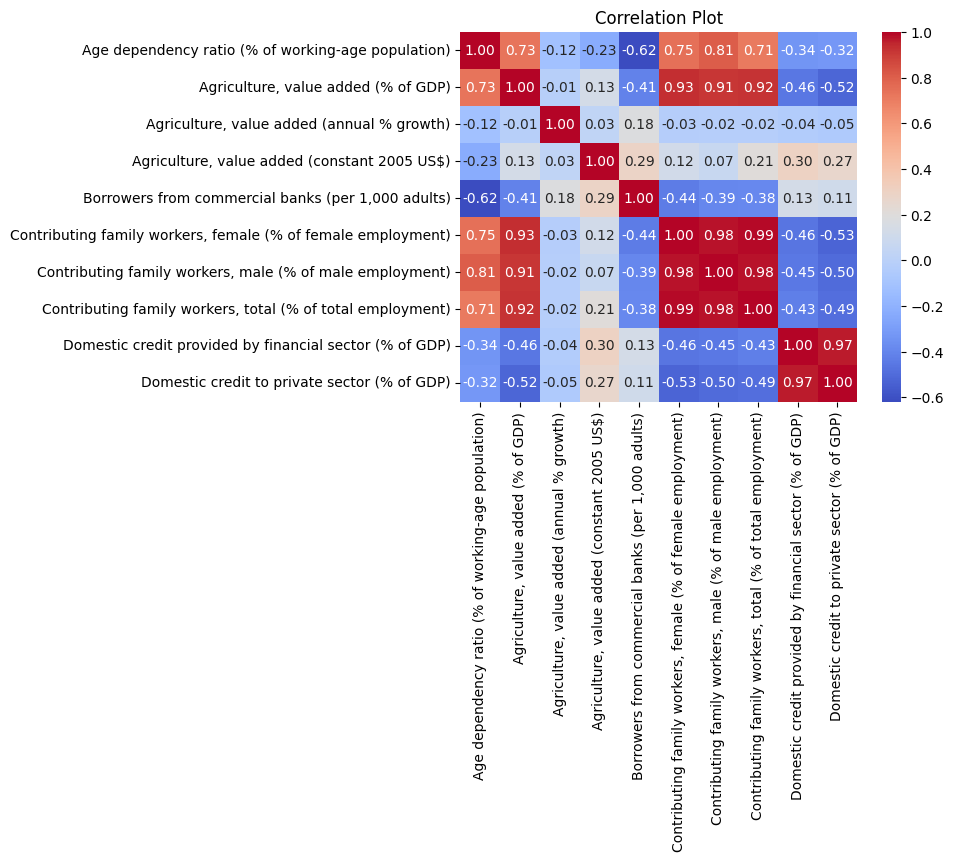

In [22]:
# Assuming 'correlation_matrix' is your correlation matrix
# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [23]:
# Assuming 'agricultural_data' is your DataFrame and 'Agriculture, value added (annual % growth)' is the column containing data
# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['Agriculture, value added (annual % growth)'], 0)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 4.980654595145534
P-Value: 1.5545815778100838e-06


In [37]:
new_names = {
    'Agriculture, value added (annual % growth)' : 'Agriculture_value_added_annual_growth',
    'Domestic credit to private sector (% of GDP)' : 'Domestic_credit_to_private_sector_GDP'
}
# Rename the columns
df = df.rename(columns=new_names)


In [36]:
df.columns

Index(['Country Name', 'Year',
       'Age dependency ratio (% of working-age population)',
       'Agriculture, value added (% of GDP)', 'agriculture_growth',
       'Agriculture, value added (constant 2005 US$)',
       'Borrowers from commercial banks (per 1,000 adults)',
       'Contributing family workers, female (% of female employment)',
       'Contributing family workers, male (% of male employment)',
       'family_worker_total_employment',
       'Domestic credit provided by financial sector (% of GDP)',
       'Domestic_credit_to_private_sector_GDP'],
      dtype='object')

In [29]:
df = df.rename(columns={'Agriculture_value_added_annual_growth': 'agriculture_growth'})
a = df['agriculture_growth']
print(a)

0       3.254081
1       3.254081
2       3.254081
3       2.799223
4     -22.237497
         ...    
165    -7.219226
166     0.509892
167    12.226055
168     1.220505
169    -6.252233
Name: agriculture_growth, Length: 170, dtype: float64


In [30]:
df.columns

Index(['Country Name', 'Year',
       'Age dependency ratio (% of working-age population)',
       'Agriculture, value added (% of GDP)', 'agriculture_growth',
       'Agriculture, value added (constant 2005 US$)',
       'Borrowers from commercial banks (per 1,000 adults)',
       'Contributing family workers, female (% of female employment)',
       'Contributing family workers, male (% of male employment)',
       'Contributing family workers, total (% of total employment)',
       'Domestic credit provided by financial sector (% of GDP)',
       'Domestic_credit_to_private_sector_GDP'],
      dtype='object')

In [31]:
 #Define the ANOVA model
formula = 'agriculture_growth~Domestic_credit_to_private_sector_GDP'
anova_model = ols(formula, data=df).fit()

# Perform ANOVA
anova_result = sm.stats.anova_lm(anova_model)

# Print the ANOVA results
print(anova_result)

pass

                                          df        sum_sq    mean_sq  \
Domestic_credit_to_private_sector_GDP    1.0     32.512379  32.512379   
Residual                               168.0  12231.127247  72.804329   

                                              F    PR(>F)  
Domestic_credit_to_private_sector_GDP  0.446572  0.504884  
Residual                                    NaN       NaN  


In [32]:
# Define the independent variables and the dependent variable
X = df[['Domestic_credit_to_private_sector_GDP', 'Contributing family workers, total (% of total employment)']]
y = df['agriculture_growth']

# Add a constant term to the independent variables (for intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
multiple_regression_model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(multiple_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:     agriculture_growth   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4359
Date:                Thu, 16 May 2024   Prob (F-statistic):              0.647
Time:                        12:57:06   Log-Likelihood:                -604.46
No. Observations:                 170   AIC:                             1215.
Df Residuals:                     167   BIC:                             1224.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

                                            Variable       VIF
0              Domestic_credit_to_private_sector_GDP  1.092768
1  Contributing family workers, total (% of total...  1.092768


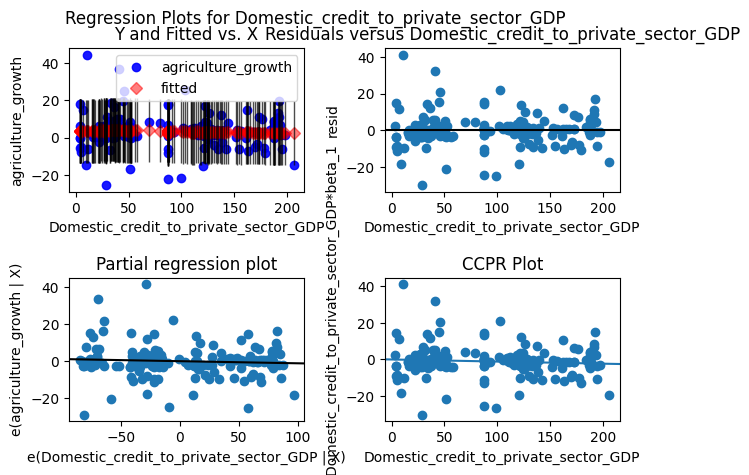

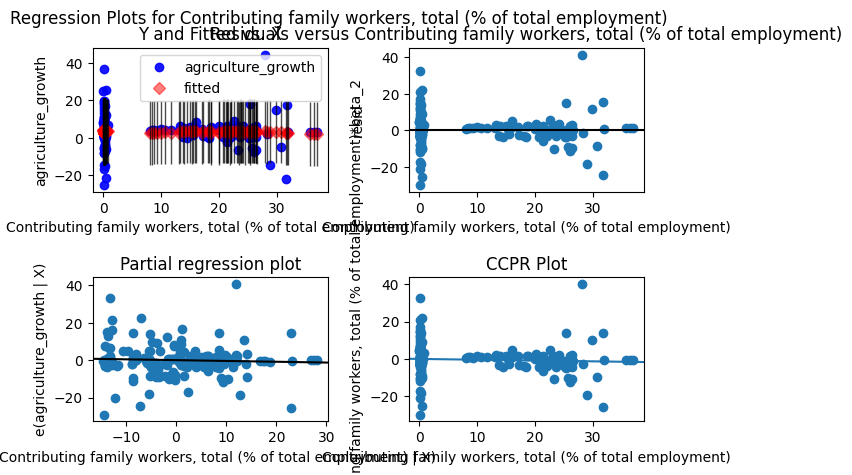

In [33]:
X = df[['Domestic_credit_to_private_sector_GDP', 'Contributing family workers, total (% of total employment)']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)
plot_regress_exog(multiple_regression_model, exog_idx=1)  # Plot for the first independent variable
plt.show()

plot_regress_exog(multiple_regression_model, exog_idx=2)  # Plot for the second independent variable
plt.show()


In [38]:
df = df.rename(columns={'Contributing family workers, total (% of total employment)': 'family_worker_total_employment'})


In [39]:
# Define the formula for the interaction model
formula = 'agriculture_growth~Domestic_credit_to_private_sector_GDP*family_worker_total_employment'

# Fit the multiple regression model with interaction
multiple_regression_model_interaction = ols(formula, data=df).fit()

# Print the summary of the regression model
print(multiple_regression_model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:     agriculture_growth   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.3393
Date:                Thu, 16 May 2024   Prob (F-statistic):              0.797
Time:                        13:01:33   Log-Likelihood:                -604.38
No. Observations:                 170   AIC:                             1217.
Df Residuals:                     166   BIC:                             1229.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

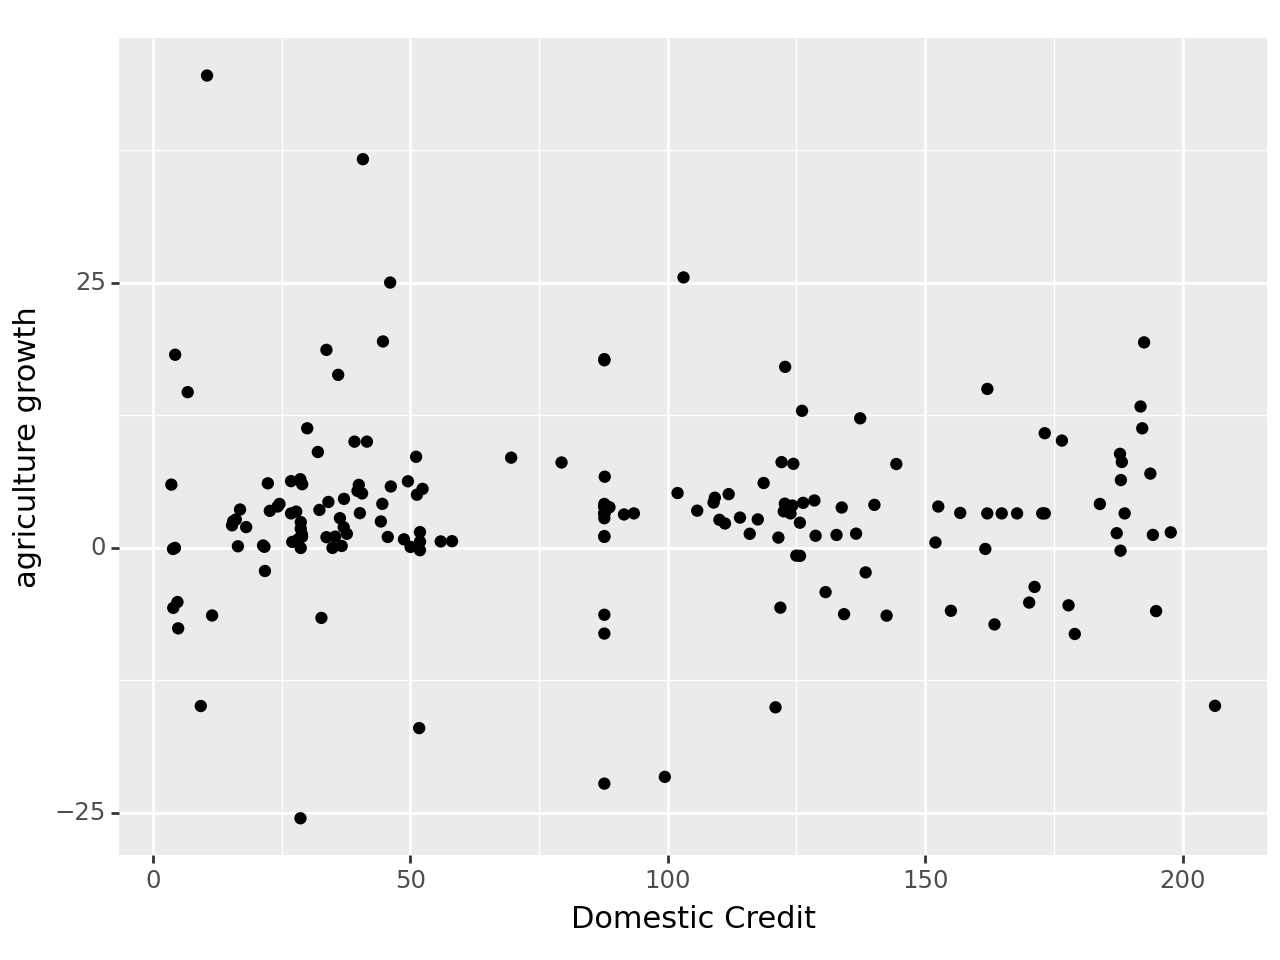

In [52]:
# Create the ggplot object
# Option 1: Passing data as a positional argument
p = ggplot(aes(x='Domestic_credit_to_private_sector_GDP', y='agriculture_growth'), df) + \
    geom_point() + \
    labs(x="Domestic Credit", y="agriculture growth")



# Print the ggplot object
print(p)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.


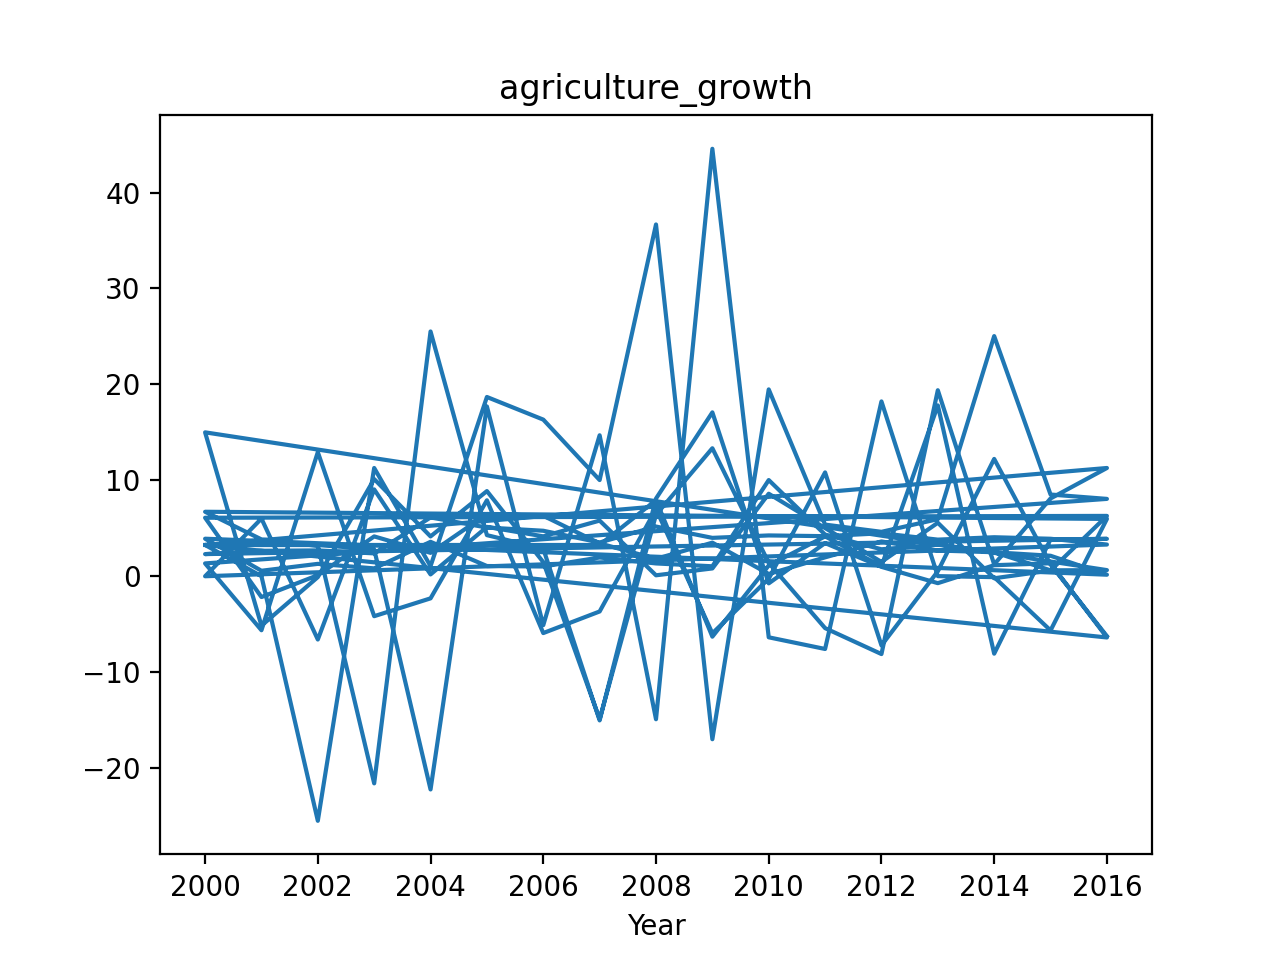

In [56]:
# Import the ARIMA model from the statsmodels library
from statsmodels.tsa.arima.model import ARIMA

# Choose the variable 'agriculture_growth' to model
variable = 'agriculture_growth'

# Assuming the data is already structured as a time series with 'Year' as the index,
# extract the time series data for the chosen variable
time_series = df.set_index('Year')[variable]

# Plot the time series to visually analyze its trends and patterns
time_series.plot(title=variable)

# Split the time series data into training and testing sets
# Here, we allocate 80% of the data for training and the remaining 20% for testing
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Fit ARIMA model
# Assuming you have identified appropriate values for p, d, and q
p, d, q = 1, 1, 1  # Example values, you should choose based on analysis
model = ARIMA(train, order=(p, d, q))
fitted_model = model.fit()

# Evaluate the fitted model (you can add more steps for evaluation)
# For example, you can forecast future values and compare them with the actual data



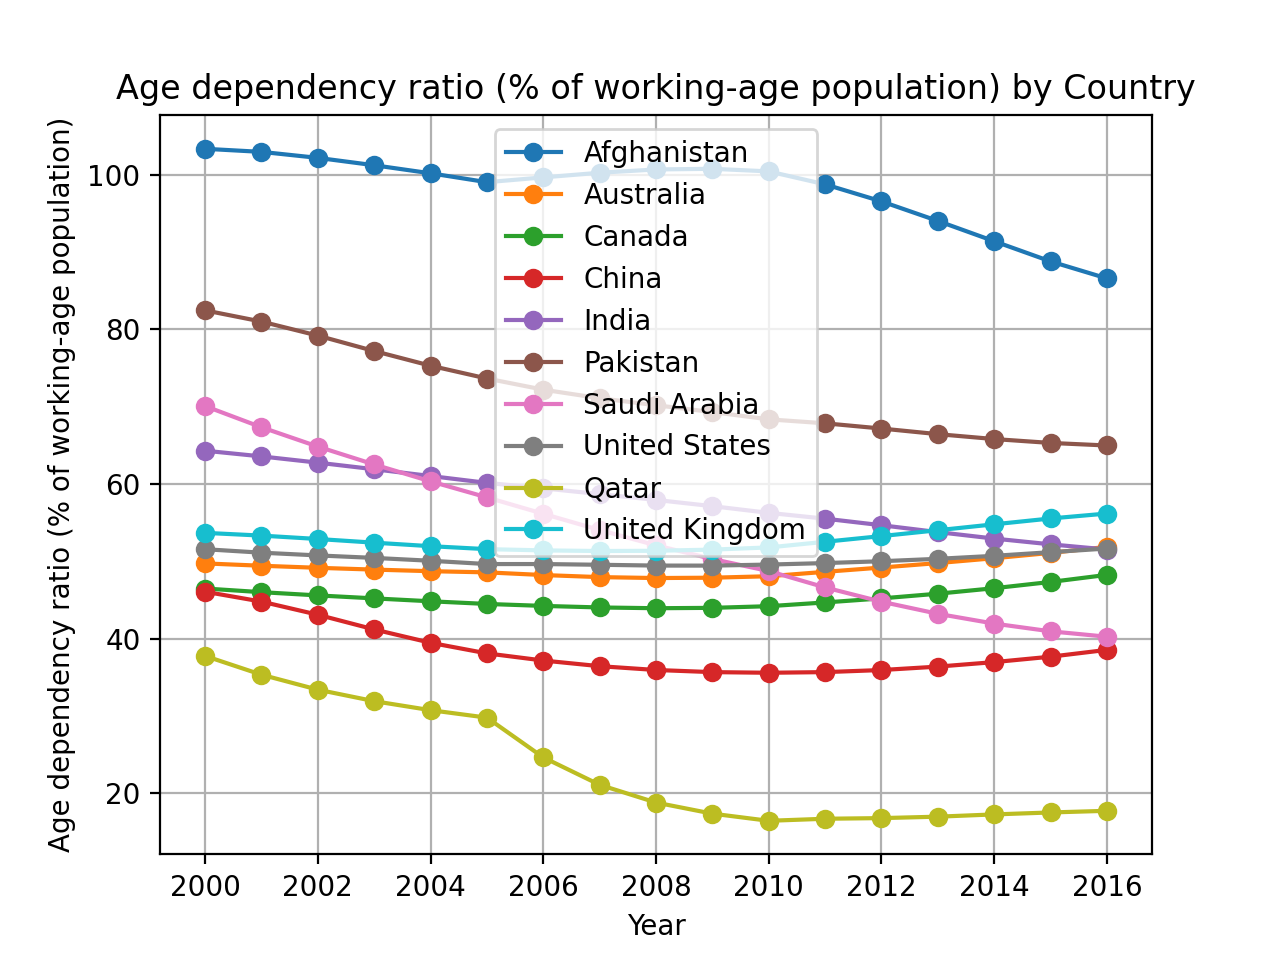

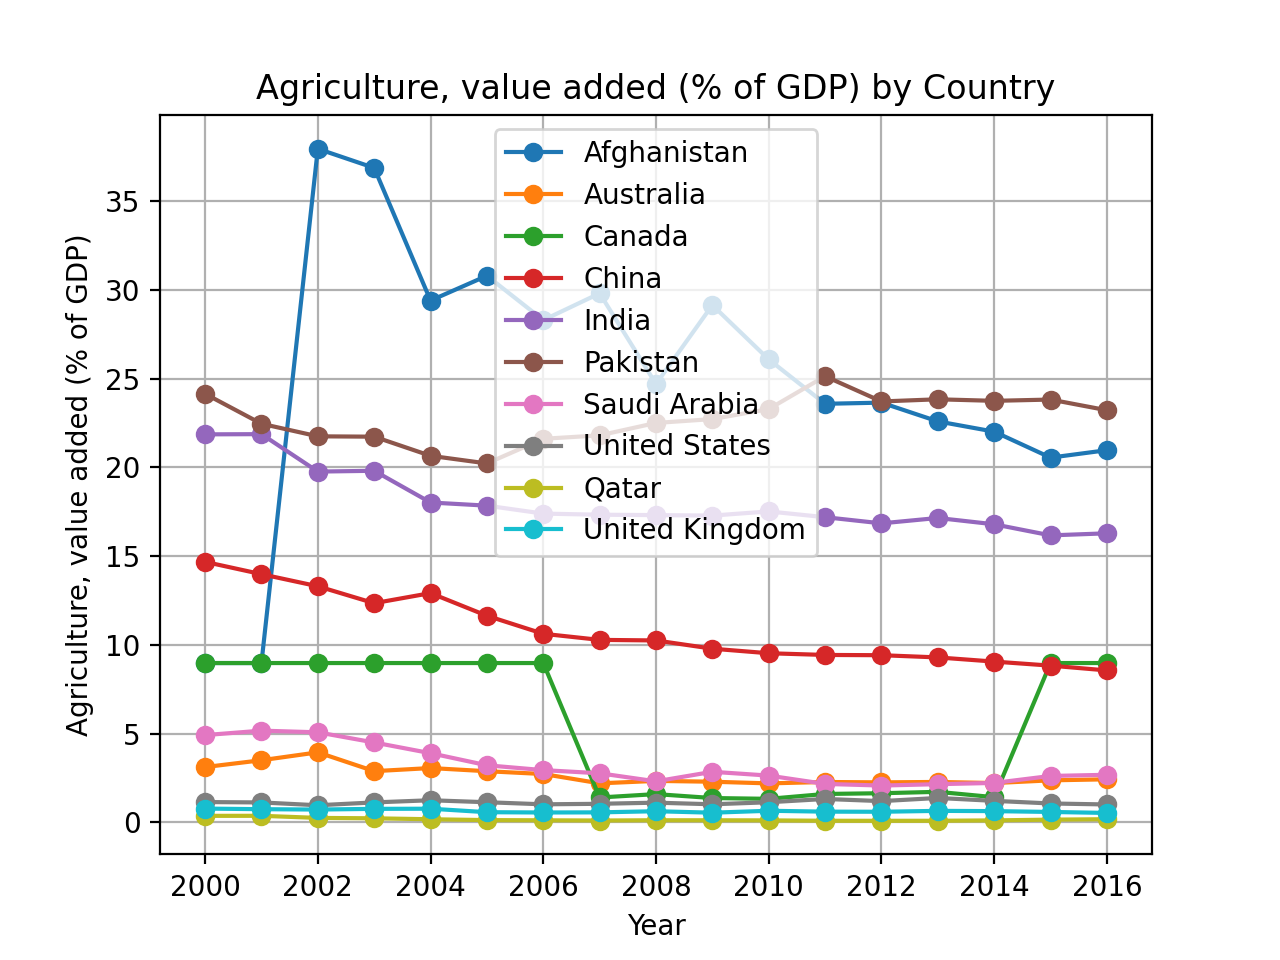

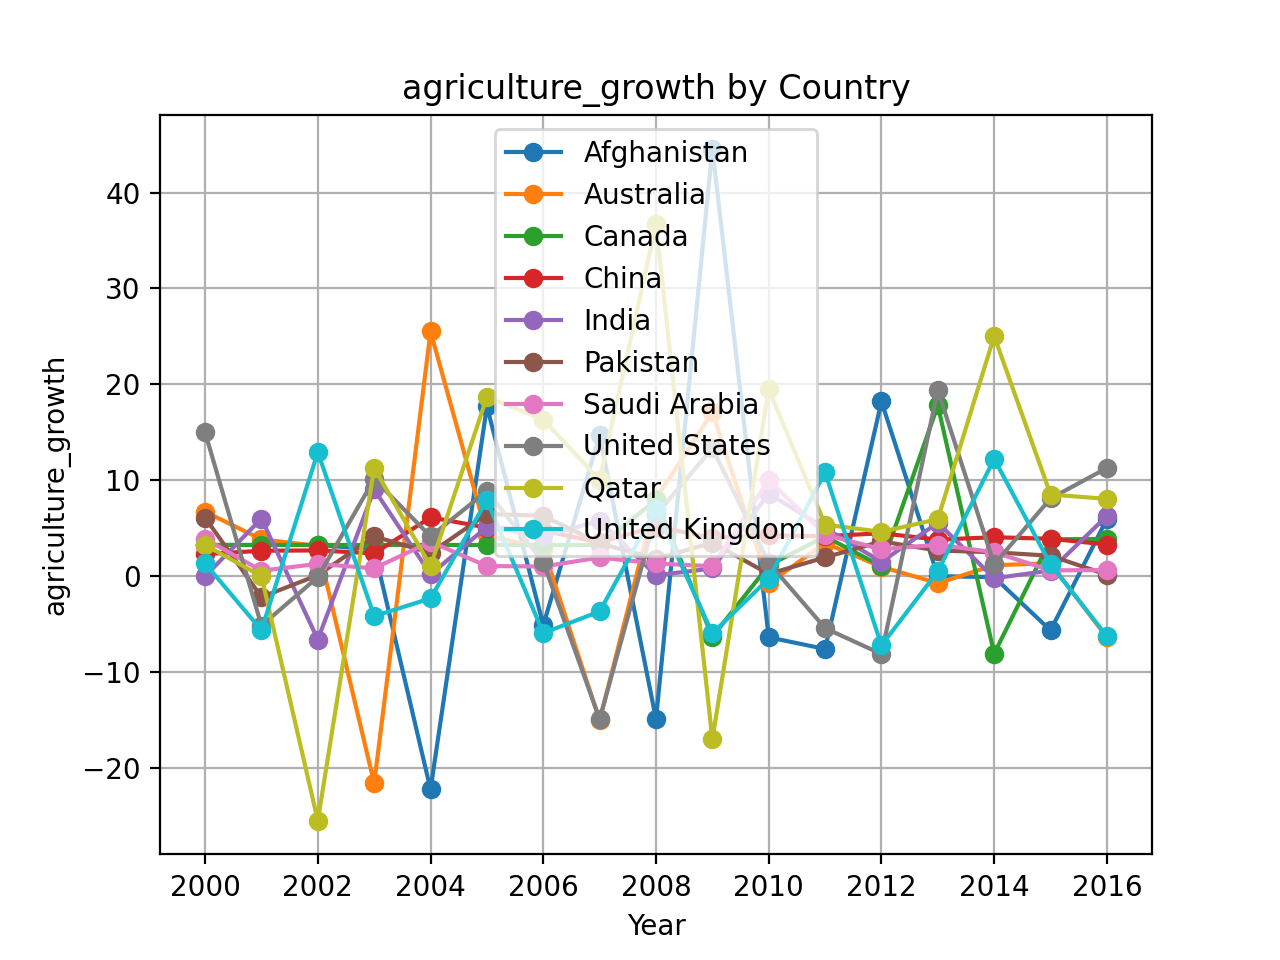

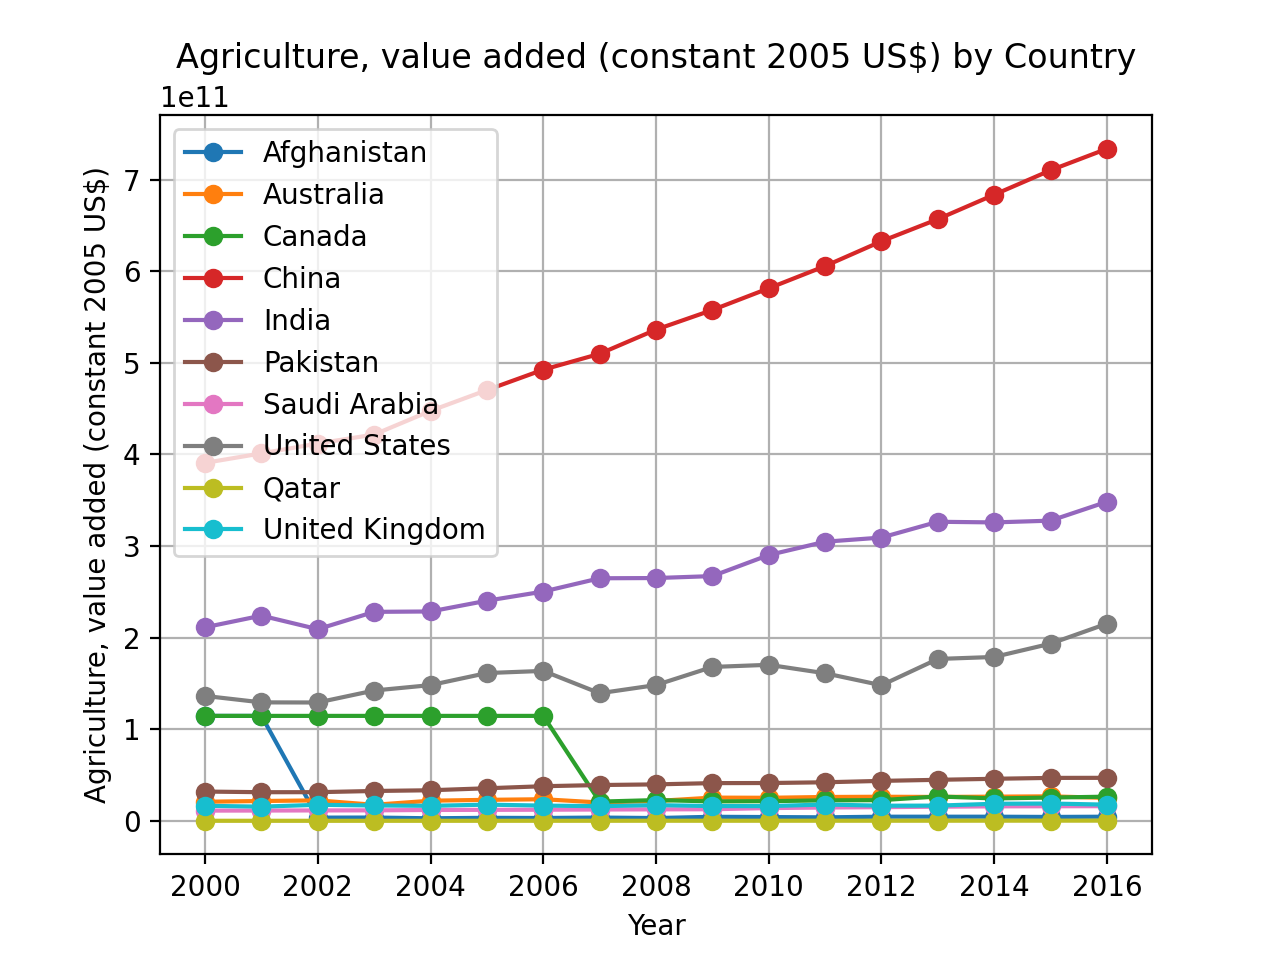

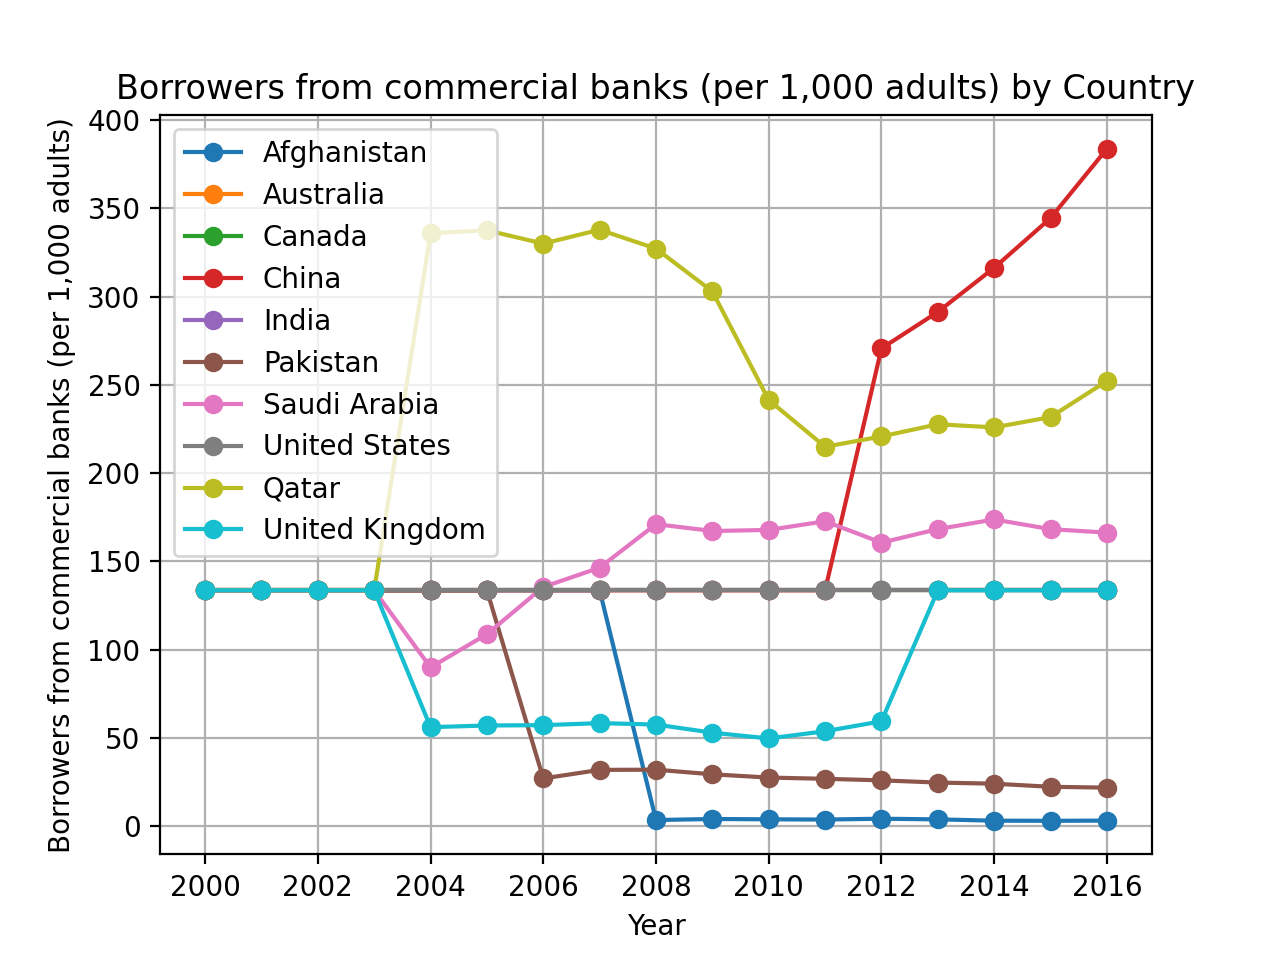

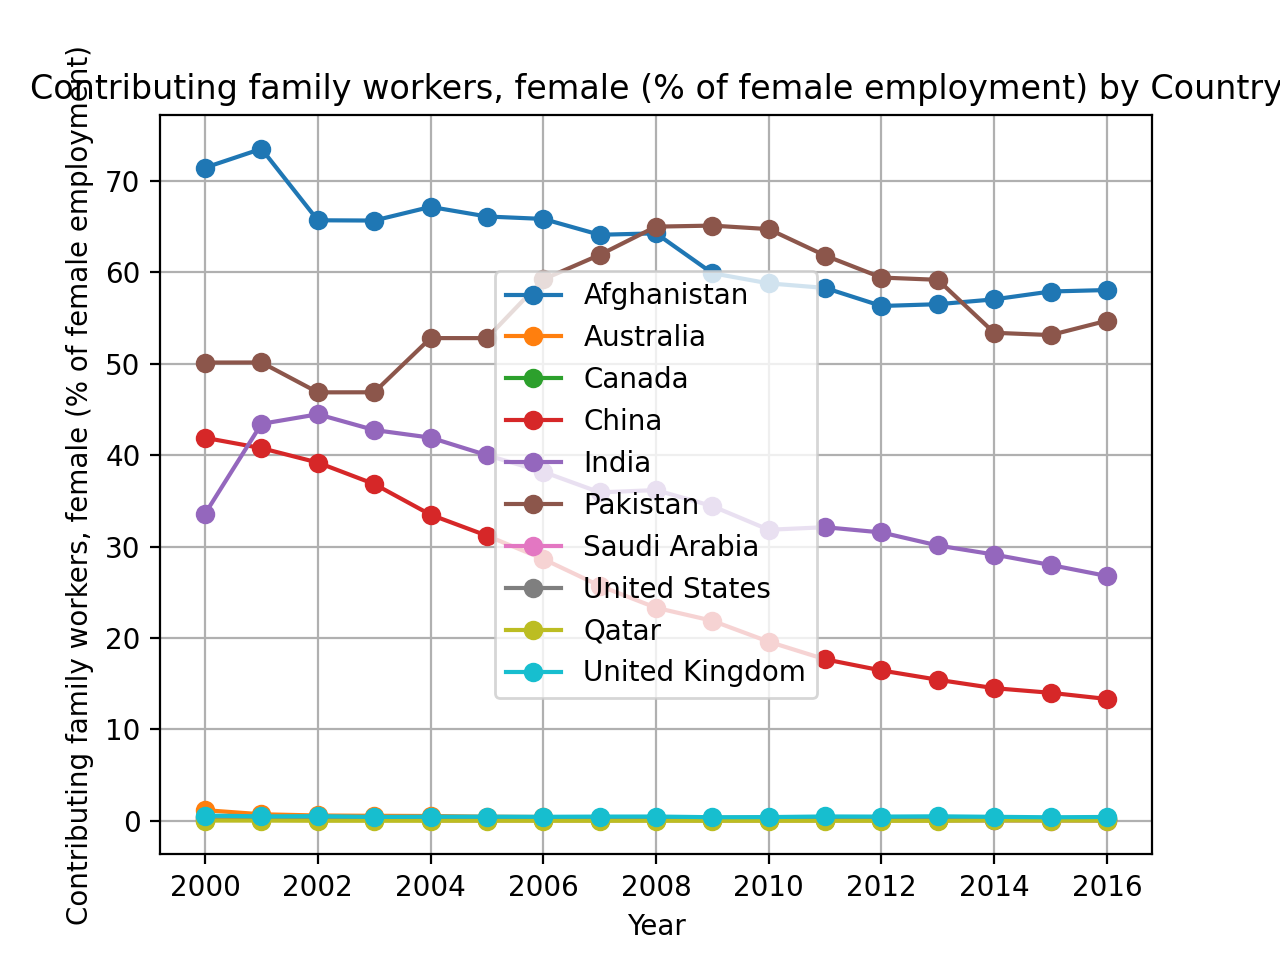

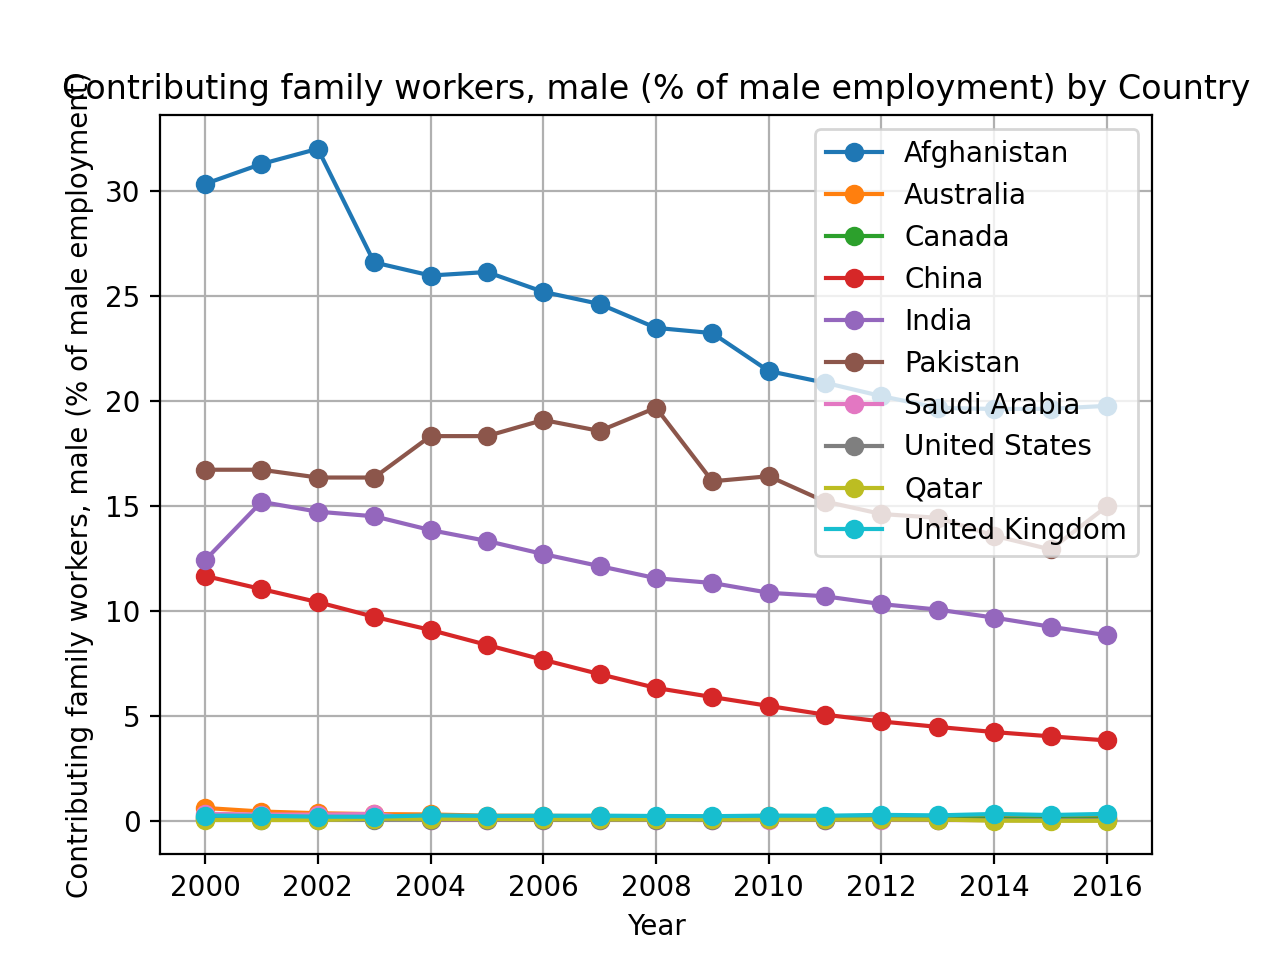

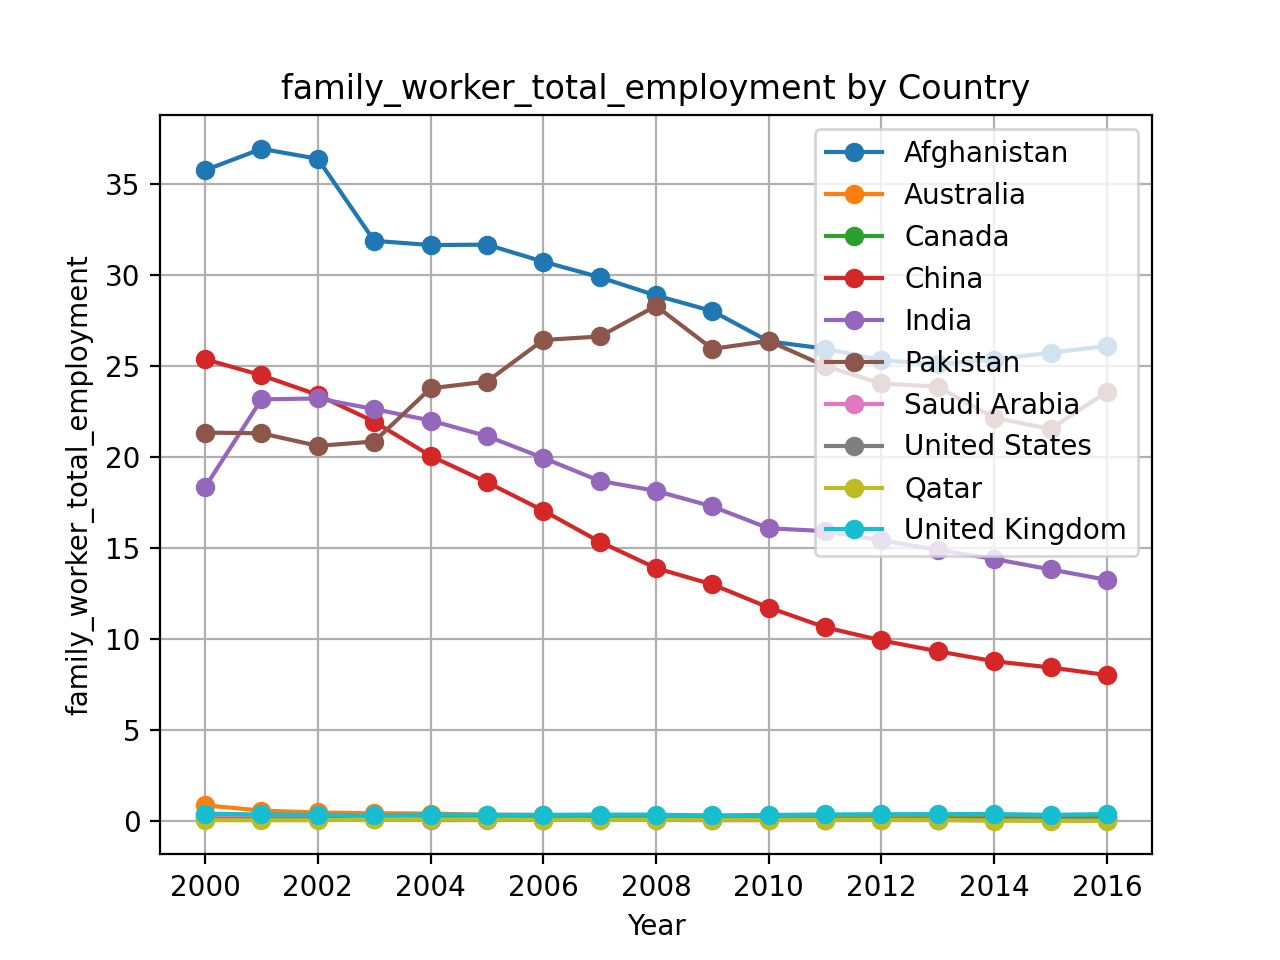

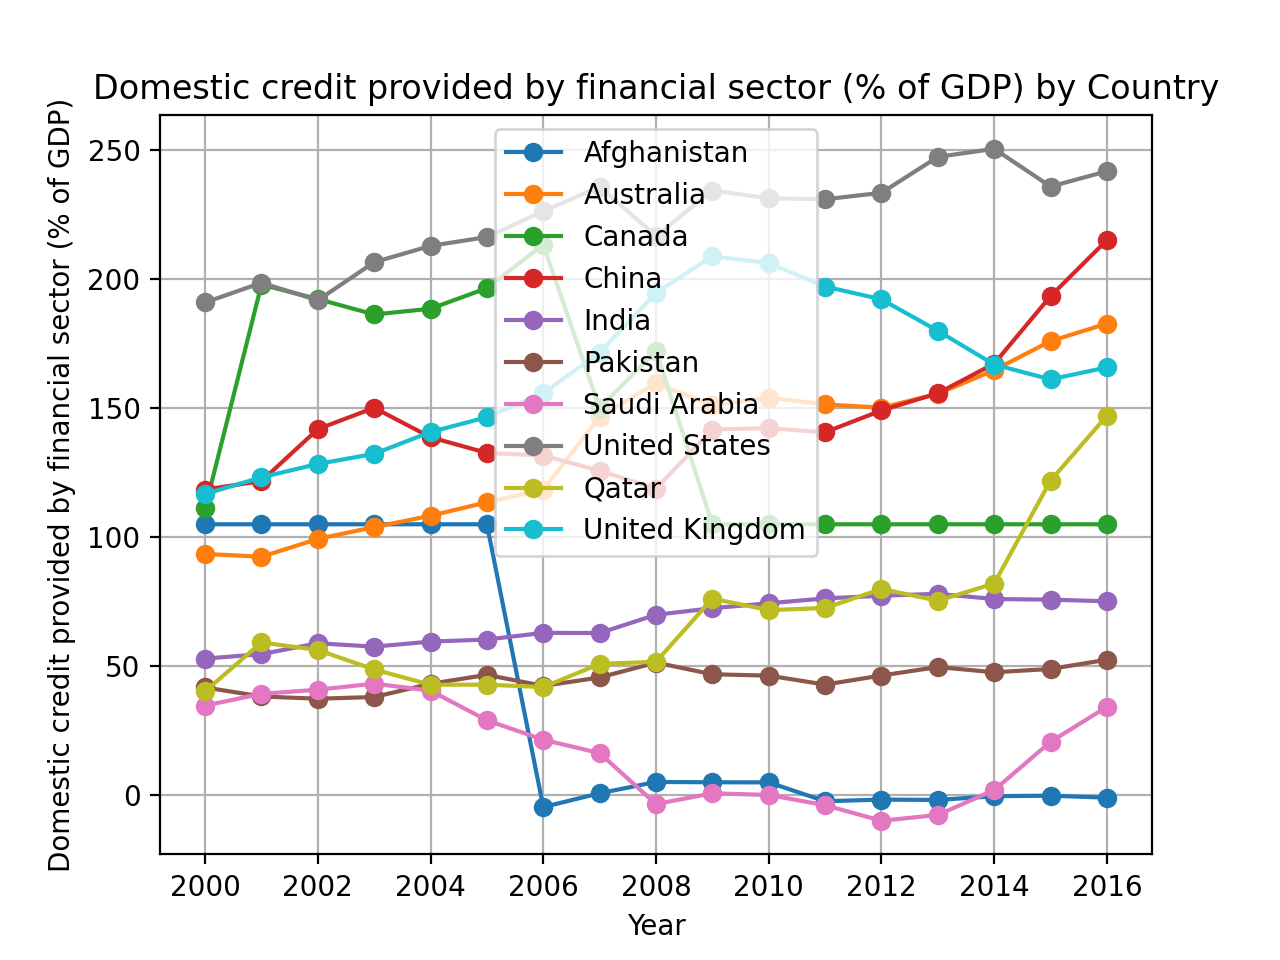

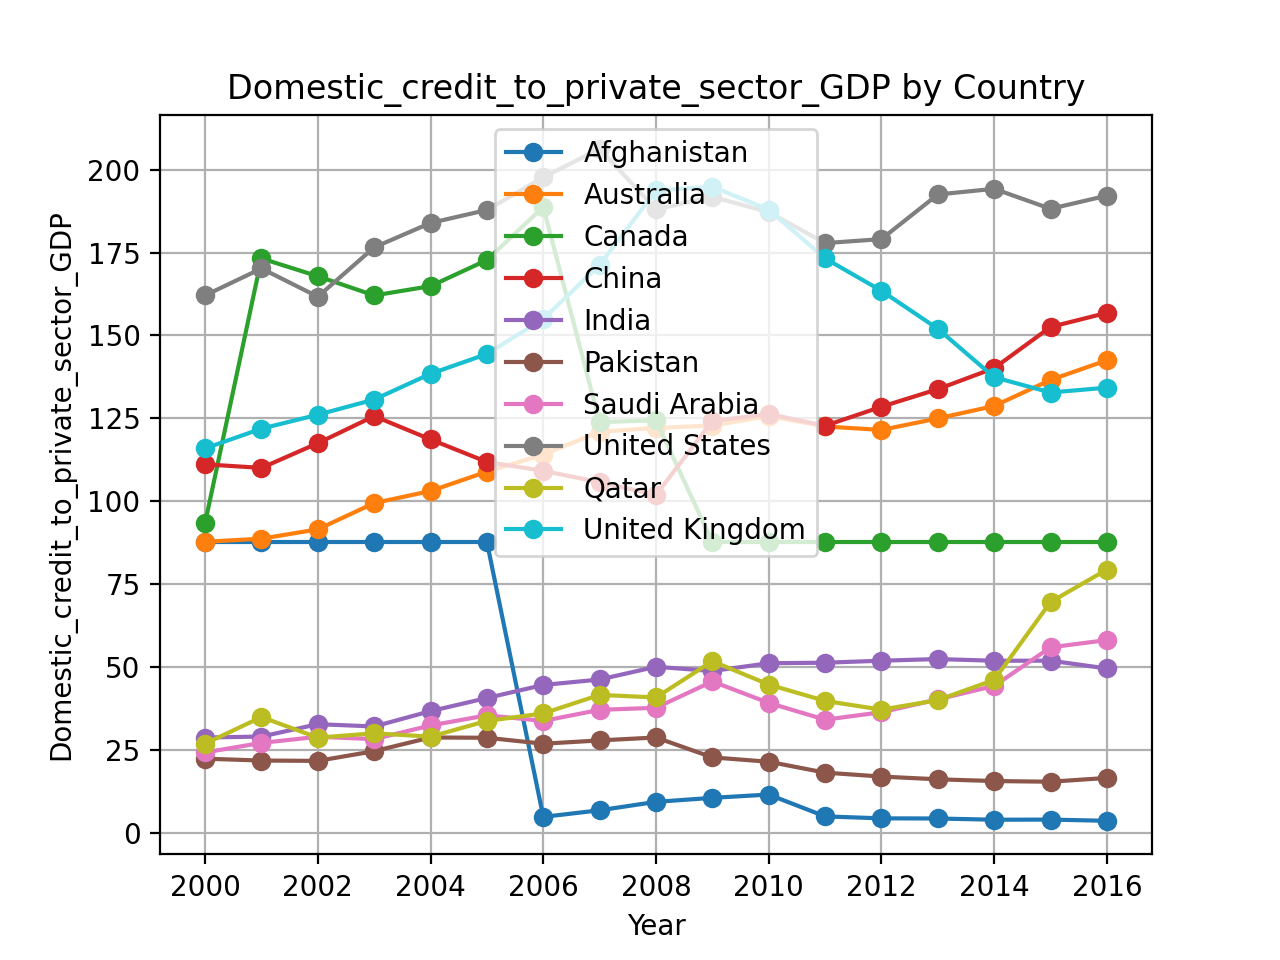

In [65]:
# Function to create various visualizations for each variable
def visualize_variable(variable):
  # Scatter plot for continuous variables
  if df[variable].dtype != 'object':
    for country in df['Country Name'].unique():
      plt.plot(df[df['Country Name'] == country]['Year'], df[df['Country Name'] == country][variable], marker='o', label=country)
    plt.xlabel('Year')
    plt.ylabel(variable)
    plt.title(f"{variable} by Country")
    plt.legend()
    plt.grid(True)
    plt.show()
  # Bar chart for categorical variables
  else:
    plt.bar(df['Country Name'], df[variable].value_counts())
    plt.xlabel('Country Name')
    plt.ylabel('Count')
    plt.title(f"{variable} Distribution")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.show()

# Iterate through each variable and create visualizations
for var in df.columns[2:]:
  visualize_variable(var)